On va maintenant utiliser des forces elastiques pour coordonner la dynamique des lames dans la trame.


<!-- TEASER_END -->

In [1]:
from elasticite import EdgeGrid
e = EdgeGrid()

fps = 20
loop = 1
autoplay = 0


pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


TypeError: make_lames() missing 1 required positional argument: 't'

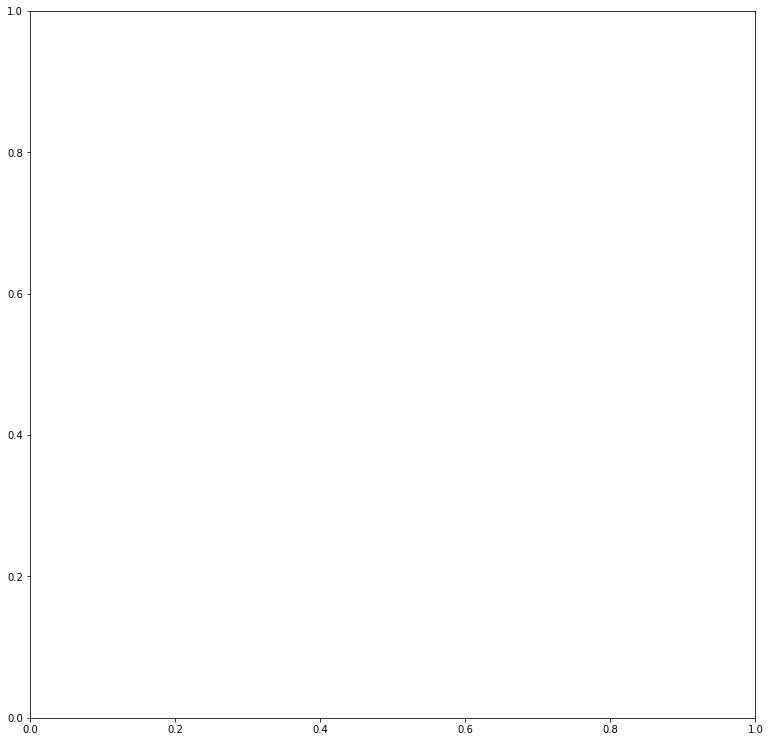

In [3]:
name = 'test_grid2'
import numpy as np
from elasticite import EdgeGrid

e = EdgeGrid()

duration = 3.
def make_lames(lames, t):
    return lames[0, :] * np.pi +  t*np.pi/duration

duration = 3.
e.make_anim(name, make_lames, duration=duration)
e.ipython_display(name)


In [ ]:
name = 'parallel_force'
import numpy as np
# re-init
e.lames[2, :] = np.pi*np.random.randn(e.N_lame)

# distance
dx = e.lames[0, :, np.newaxis]-e.lames[0, np.newaxis, :]
dy = e.lames[1, :, np.newaxis]-e.lames[1, np.newaxis, :]

distance = np.sqrt(dx **2 + dy **2)

def make_lames(lames, t):
    angle_relatif = lames[2, :, np.newaxis]-lames[2, np.newaxis, :]
    lames[2, :] += -.0001 * np.sum(np.sin(2*angle_relatif)/(distance+.1), axis=1)
    lames[2, :] += .01*np.pi*np.random.randn(e.N_lame)
    return lames[2, :]

duration = 10.
e.make_anim(name, make_lames, duration=duration, redo=True)
e.ipython_display(name)

In [ ]:
name = 'cocircular_force'
# re-init
e.lames[2, :] = np.pi*np.random.randn(e.N_lame)

# distance
dx = e.lames[0, :, np.newaxis]-e.lames[0, np.newaxis, :]
dy = e.lames[1, :, np.newaxis]-e.lames[1, np.newaxis, :]

distance = np.sqrt(dx **2 + dy **2)

def make_lames(lames, t):
    theta = lames[2, :, np.newaxis]-lames[2, np.newaxis, :]
    psi = np.arctan2(dy, dx) - np.pi/2 - theta
    psi -= theta/2
    lames[2, :] += .000125 * np.sum(np.sin(2**psi)/(distance+.1), axis=1)
    lames[2, :] += .00*np.pi*np.random.randn(e.N_lame)
    return lames[2, :]

duration = 10.
e.make_anim(name, make_lames, duration=duration)#, redo=True)
e.ipython_display(name)

In [ ]:
name = 'cocircular_antiparallel_force'
import numpy as np
# re-init
e.lames[2, :] = np.pi*np.random.randn(e.N_lame)

# distance
dx = e.lames[0, :, np.newaxis]-e.lames[0, np.newaxis, :]
dy = e.lames[1, :, np.newaxis]-e.lames[1, np.newaxis, :]

distance = np.sqrt(dx **2 + dy **2)

def make_lames(lames, t):
    theta = lames[2, :, np.newaxis]-lames[2, np.newaxis, :]
    psi = np.arctan2(dy, dx) - np.pi/2 - theta
    psi -= theta/2
    lames[2, :] += .00125 * np.sum(np.sin(theta)/(distance+.1), axis=1)
    lames[2, :] += -.00125 * np.sum(np.sin(psi)/(distance+.1), axis=1)
    lames[2, :] += .001*np.pi*np.random.randn(e.N_lame)
    return lames[2, :]

duration = 10.
e.make_anim(name, make_lames, duration=duration)#, redo=True)
e.ipython_display(name)